# Analysis of the data - first look and what to do

In [1]:
# Import stuff
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import glob
import os

## Load the data

In [3]:
data_path = '../data/'  # This is where the data is stored
deloitte_path = data_path + 'carseg_data/'
array_path = deloitte_path + 'arrays/'  # Full path: data/carseg_data/arrays/

# Several image folders - mostly for visual inspection.
images_path = deloitte_path + 'images/'
car_photos_path = images_path + 'photo/'
black_5_doors_path = images_path + 'black_5_doors/'
orange_3_doors_path = images_path + 'orange_3_doors/'
landscapes_path = images_path + 'landscapes/'

# Good images
good_path = images_path + 'good/'

# Test images
test_arr_path = data_path + 'test_data/array/'
test_img_path = data_path + 'test_data/image/'

In [42]:
good_imgs = glob.glob(good_path + '*.*')
good_black = glob.glob(good_path + 'black_good/*.png')
good_orange = glob.glob(good_path + 'orange_good/*.png')
good_photo = glob.glob(good_path + 'photo_good/*.jpg')

# Number of images
print(f"Number of good black images: {len(good_black)}")
print(f"Number of good orange images: {len(good_orange)}")
print(f"Number of good photo images: {len(good_photo)}")


Number of good black images: 320
Number of good orange images: 807
Number of good photo images: 113


In [6]:
test_arr = glob.glob(test_arr_path + '*.*')
test_imgs = glob.glob(test_img_path + '*.*')

test_arr = np.array([np.load(arr) for arr in test_arr])
test_imgs = [plt.imread(img) for img in test_imgs]
# Number of images
print(f"Number of test array images: {test_arr.shape}")
print(f"Number of test image images: {len(test_imgs)}")

Number of test array images: (10, 256, 256, 4)
Number of test image images: 10


## Visualise the data

In [4]:
# Get the 169 256x256x3 images and their corresponding ground truth
photo_imgs = glob.glob(car_photos_path + 'no_segmentation/'+ '*.jpg')
photo_imgs_gt = glob.glob(car_photos_path + 'with_segmentation/'+ '*.jpg')
photo_imgs.sort()
photo_imgs_gt.sort()
print(f"Number of photos: {len(photo_imgs)}")

Number of photos: 168


In [5]:
black_imgs_gt = glob.glob(black_5_doors_path + 'with_segmentation/'+ '*.png')
black_imgs_gt.sort()

# Read the images as pictures
black_imgs_gt = [plt.imread(img) for img in black_imgs_gt]

In [6]:
array_names = glob.glob(array_path + '*.npy')
array_names.sort()
print(f"Number of arrays: {len(array_names)}")

Number of arrays: 3003


In [68]:
# Get the good arrays
good_black_arrays = []
good_orange_arrays = []
good_photo_arrays = []
            
color_to_goods = {
    'black': (good_black, '.png', good_black_arrays),
    'orange': (good_orange, '.png', good_orange_arrays),
    'photo': (good_photo, '.jpg', good_photo_arrays),
}

good_array_folder = '../data/carseg_data/good_arrays/'

for array in array_names:
    number = array.split('.npy')[0][-4:]
    for color, (good_imgs, ext, good_arrays) in color_to_goods.items():
        if color in array:
            for good in good_imgs:
                good_number = good.split(ext)[0][-4:]
                if number == good_number:
                    good_arrays.append(array)
                    # Copy this file to the good arrays folder
                    os.system(f"cp {array} {good_array_folder}")
                    break

print(f"Number of good black arrays: {len(good_black_arrays)}")
print(f"Number of good orange arrays: {len(good_orange_arrays)}")
print(f"Number of good photo arrays: {len(good_photo_arrays)}")


Number of good black arrays: 320
Number of good orange arrays: 807
Number of good photo arrays: 113


In [83]:
good_arrays_names = glob.glob(good_array_folder + '*.npy')
good_arrays_names.sort()

# Load the arrays
good_arrays = [np.load(array) for array in good_arrays_names]

In [7]:
black_arrays = []
orange_arrays = []
photo_arrays = []

for array in array_names:
    if 'black' in array:
        black_arrays.append(np.load(array))
    if 'orange' in array:
        orange_arrays.append(np.load(array))
    if 'photo' in array:
        photo_arrays.append(np.load(array))

black_arrays = np.array(black_arrays)
orange_arrays = np.array(orange_arrays)
photo_arrays = np.array(photo_arrays)


print(f"Number of black arrays: {len(black_arrays)}")
print(f"Number of orange arrays: {len(orange_arrays)}")
print(f"Number of photo arrays: {len(photo_arrays)}")
print(f"Total: {len(black_arrays) + len(orange_arrays) + len(photo_arrays)}")

Number of black arrays: 834
Number of orange arrays: 2001
Number of photo arrays: 168
Total: 3003


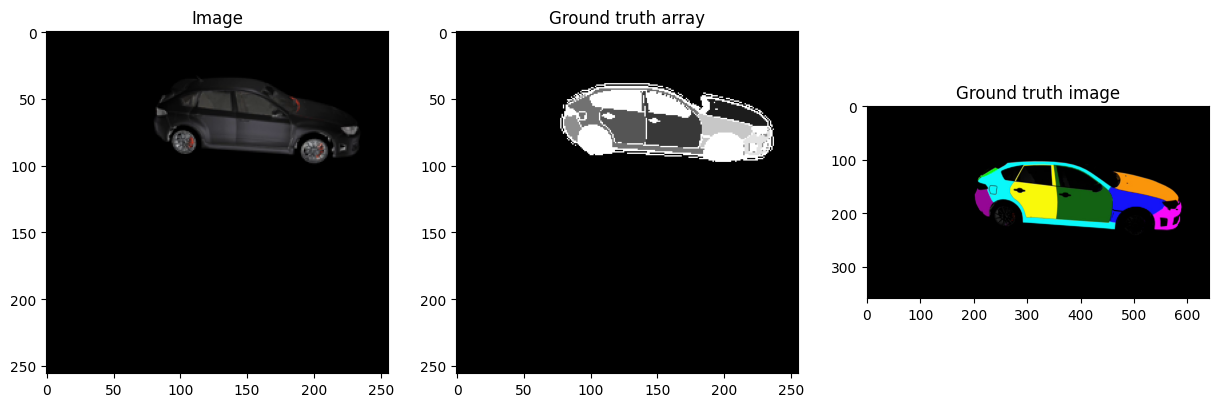

In [8]:
# Show the first image next to its ground truth
fig, ax = plt.subplots(1,3, figsize=(15,10))
ax[0].imshow(black_arrays[0][:,:,0:3])
ax[0].set_title('Image')
ax[1].imshow(black_arrays[0][:,:,3], cmap='gray')  # Is hsv the right cmap? Best one I could find
ax[1].set_title('Ground truth array')
ax[2].imshow(black_imgs_gt[0])
ax[2].set_title('Ground truth image')
plt.show()


## Classification meaning

| Color | Description | Class value |
| ------| ----------- | ----------- |
| original | not part of car | 0 |
| Orange | hood | 10 |
| dark green | front door | 20 |
| yellow | rear door | 30 |
| cyan | frame | 40 |
| purple | rear quarter panel | 50 |
| light green | trunk lid | 60 |
| blue | fender | 70 |
| pink | bumper | 80 |
| no colour | rest of car | 90 |


In [7]:
def classifyPixel(x, y, img):
    """
    Classify a pixel according to the ground truth
    """
    if img[x,y,3] == 0:
        print("Background")
    elif img[x,y,3] == 10:
        print("Hood")
    elif img[x,y,3] == 20:
        print("Front door")
    elif img[x,y,3] == 30:
        print("Rear door")
    elif img[x,y,3] == 40:
        print("Frame")
    elif img[x,y,3] == 50:
        print("Rear quarter panel")
    elif img[x,y,3] == 60:
        print("Trunk lid")
    elif img[x,y,3] == 70:
        print("Fender")
    elif img[x,y,3] == 80:
        print("Bumper")
    elif img[x,y,3] == 90:
        print("Rest of car")
        

In [8]:
def label2colours(label_arr):
    l2c_dict = {
        # Label: (R, G, B) color
        0: (255, 255, 255),      # 0: background
        10: (250, 150, 10),      # 10: Orange Hood
        20: (20, 100, 20),       # 20: Dark Green Front Door
        30: (250, 250, 10),      # 30: Yellow Rear Door
        40: (10, 250, 250),      # 40: Cyan Frame
        50: (150, 10, 150),      # 50: Purple Rear Quarter Panel
        60: (10, 250, 10),       # 60: Light Green Trunk Lid
        70: (20, 20, 250),       # 70: Blue Fender
        80: (250, 10, 250),      # 80: Pink Bumper
        90: (0, 0, 0),           # 90: No Color (Rest of Car)
    }
    # Create an empty color image with the same dimensions as the label image
    color_image = np.zeros((label_arr.shape[0], label_arr.shape[1], 3), dtype=np.uint8)

    # Map labels to colors and fill the color image accordingly
    for label, color in l2c_dict.items():
        color_image[label_arr == label] = color

    return color_image

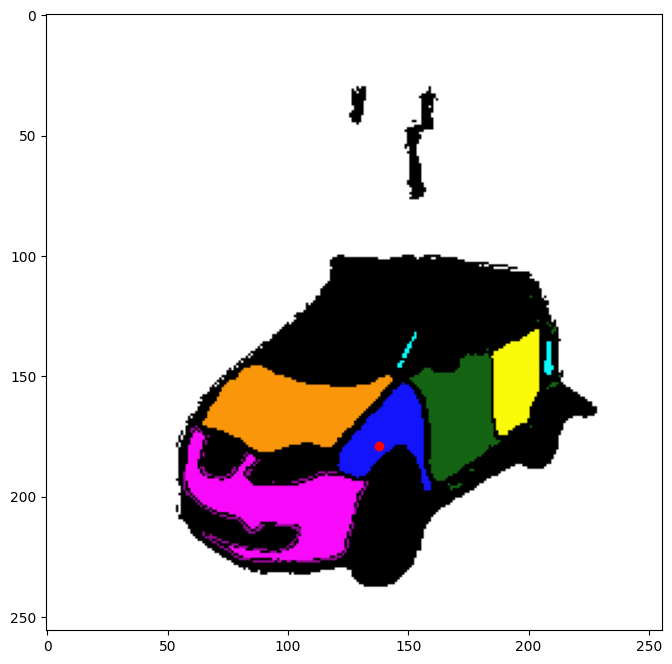

Fender


In [11]:
# Display the pixel x,y in the original image with a red dot
x, y = 179, 138
img_n = 13     # from 505 to 1275 in orange array there's "rest of car" in the background  (similar in black and photos)
plt.figure(figsize=(8,8))
plt.imshow(label2colours(photo_arrays[img_n][:,:,3]))
plt.scatter(y, x, c='r')
plt.show()

# Classify the pixel
classifyPixel(x, y, photo_arrays[img_n])

In [12]:
import time
from IPython.display import clear_output

# Display the entire array and each individual image's mask (as a video)
arrays = good_arrays[345:]

# photo_arrays, black_arrays, orange_arrays
for i in range(len(arrays)):
    plt.figure(figsize=(8,8))
    plt.imshow(label2colours(arrays[i][:,:,3]))
    plt.title(f"{good_arrays_names[i+345]}")
    plt.show()
    
    
    input()
    # time.sleep(0.001)
    clear_output(wait=True)

NameError: name 'good_arrays' is not defined

## Highlighting the current problem

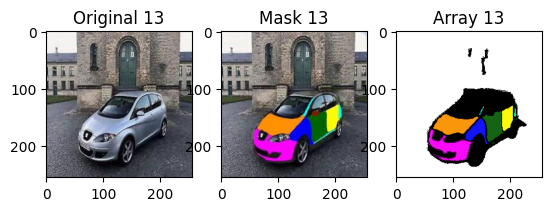

In [17]:
# Look at a single image's mask
n = 13
arr = photo_arrays[n]
img = plt.imread(photo_imgs[n])
img_gt = plt.imread(photo_imgs_gt[n])
plt.subplot(1,3,1)
plt.imshow(img)
plt.title(f"Original {n}")
plt.subplot(1,3,2)
plt.imshow(img_gt)
plt.title(f"Mask {n}")
plt.subplot(1,3,3)
plt.imshow(label2colours(arr[:,:,3]))
plt.title(f"Array {n}")
plt.show()

## Manual mask creation
Below is me trying to find the perfect mask manually - turns out I run into the same troubles as those that gave us the dataset..

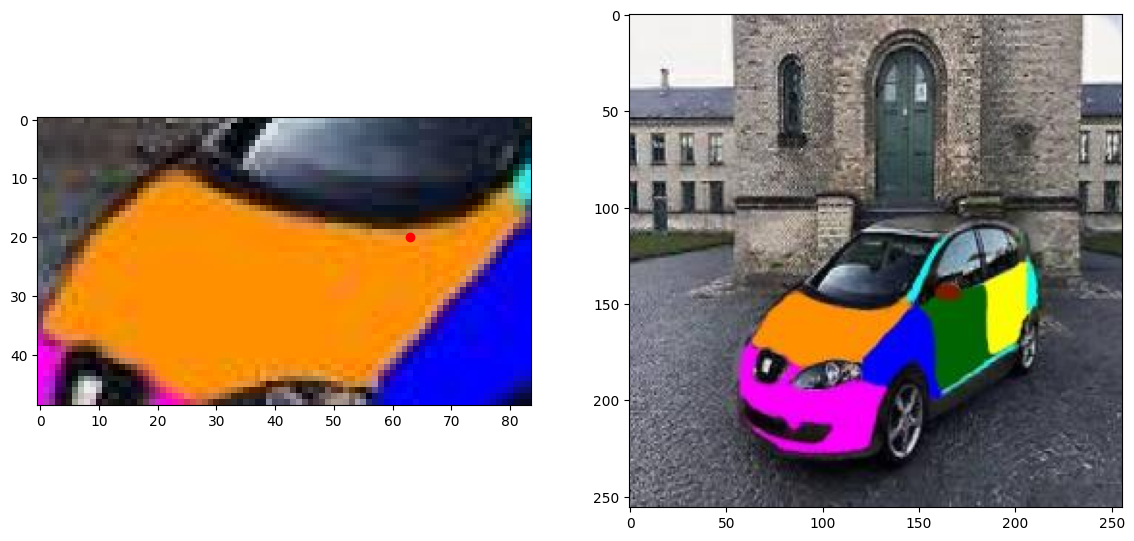

[239 145  47]


In [27]:
from PIL import Image
# look at the conversion from image to array
n = 13
img = Image.open(photo_imgs_gt[n])
arr = np.array(img)

# The array is know the ground truth - want to make it a 4D array where last dimension denotes the part of the car
# 0: background
# Orange mask: r=(120-255), g=(80-170), b=(0-90)
# Dark green mask: r=(0-90), g=(120-255), b=(0-90)
# Colour the orange pixels in the image white
colour_to_change = (250, 150, 10) # Orange
new_colour = (255, 255, 255) # White
r_min, r_max = 249, 251
g_min, g_max = 149, 151
b_min, b_max = 9, 11

mask = (arr[:,:,0] >= r_min) & (arr[:,:,0] <= r_max) & (arr[:,:,1] >= g_min) & \
       (arr[:,:,1] <= g_max) & (arr[:,:,2] >= b_min) & (arr[:,:,2] <= b_max)

arr[mask] = new_colour
x, y = 20, 63
cutout = arr[135:184, 63:147]
plt.figure(figsize=(14,8))
plt.subplot(1,2,1)
plt.imshow(cutout)
plt.scatter(y, x, c='r')
plt.subplot(1,2,2)
plt.imshow(arr)
plt.show()
print(cutout[x,y])

## Our new test set

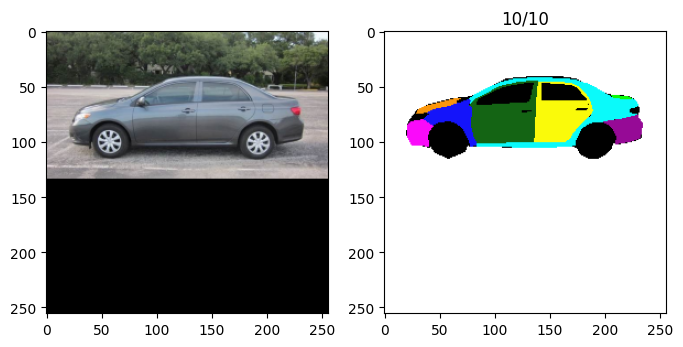

In [18]:
import time
from IPython.display import clear_output

# Display the entire array and each individual image's mask (as a video)
arrays = test_arr

# photo_arrays, black_arrays, orange_arrays
for i in range(len(arrays)):
    plt.figure(figsize=(8,8))
    plt.subplot(1,2,1)
    plt.imshow(arrays[i][:,:,0:3])
    plt.subplot(1,2,2)
    plt.imshow(label2colours(arrays[i][:,:,3]))
    plt.title(f"{i+1}/{len(arrays)}")
    plt.show()
    
    
    input()
    # time.sleep(0.9)
    clear_output(wait=True)